## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df=pd.read_csv("Housing.csv")
# print(df.head(5))
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [2]:
#2 Check the shape of the DataFrame (rows, columns)
print(df.shape)

(545, 13)


In [3]:
#3 Look at the data types of the columns
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [4]:
#4 Check for missing  values if any, replace with appropriate values
miss=df.isnull().sum()
num_col=df.select_dtypes(include=["number"]).columns
df[num_col]=df[num_col].fillna(df[num_col].median())
cat_col=df.select_dtypes(include=["object"]).columns
for col in cat_col:
    df[col]=df[col].fillna(df[col].mode()[0])
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [5]:
#5 Prepare  X (independent variables) and y (dependent variable)
X=df.drop(columns=['price'])
y=df['price']

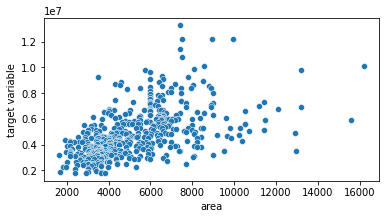

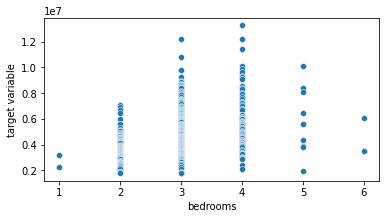

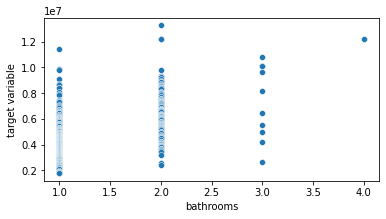

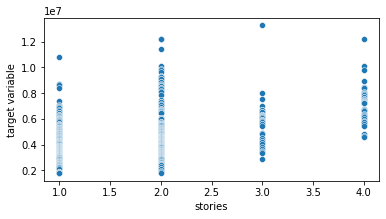

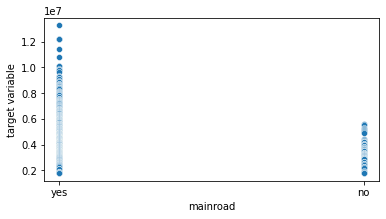

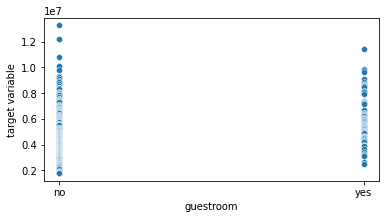

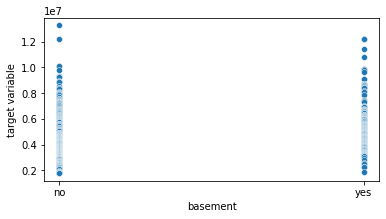

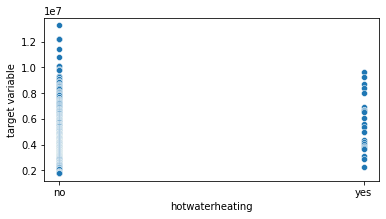

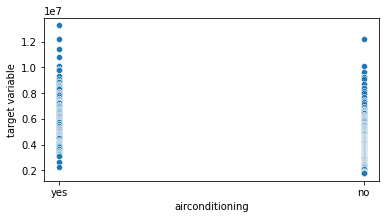

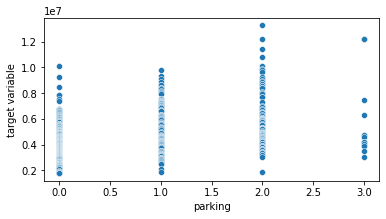

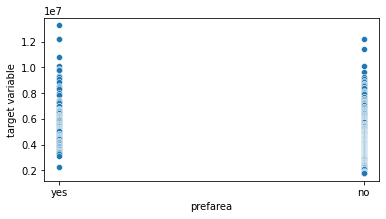

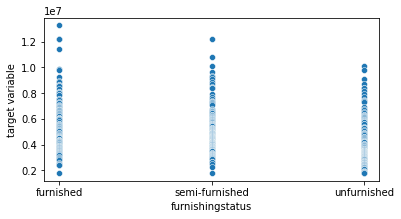

In [6]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
for col in X.columns:
    plt.figure(figsize=(6,3))
    sns.scatterplot(x=df[col],y=y)
    plt.xlabel(col)
    plt.ylabel("target variable")
    plt.show()


In [7]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col]=label_encoder.fit_transform(X[col])
    
print(X.head(5))
    

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 0  
1                0                1        3         0                 0  
2                0                0        2         1                 1  
3                0                1        3         1                 0  
4                0                1        2         0                 0  


In [8]:
#8  Avoiding the Dummy Variable Trap
x=pd.get_dummies(X,drop_first=True)
print(x.head())

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 0  
1                0                1        3         0                 0  
2                0                0        2         1                 1  
3                0                1        3         1                 0  
4                0                1        2         0                 0  


In [9]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
num_cols=X.select_dtypes(include=['int64','float64']).columns
scaler=StandardScaler()
X[num_cols]=scaler.fit_transform(X[num_cols])
print(X.head())


       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  1.046726  1.403419   1.421812  1.378217  0.405623  -0.465315 -0.734539   
1  1.757010  1.403419   5.405809  2.532024  0.405623  -0.465315 -0.734539   
2  2.218232  0.047278   1.421812  0.224410  0.405623  -0.465315  1.361397   
3  1.083624  1.403419   1.421812  0.224410  0.405623  -0.465315  1.361397   
4  1.046726  1.403419  -0.570187  0.224410  0.405623   2.149083  1.361397   

   hotwaterheating  airconditioning   parking  prefarea  furnishingstatus  
0        -0.219265         1.472618  1.517692  1.804941         -1.406286  
1        -0.219265         1.472618  2.679409 -0.554035         -1.406286  
2        -0.219265        -0.679063  1.517692  1.804941         -0.091662  
3        -0.219265         1.472618  2.679409  1.804941         -1.406286  
4        -0.219265         1.472618  1.517692 -0.554035         -1.406286  


In [10]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)
print("intercept",regression.intercept_)
print("coefficient",regression.coef_)

intercept 4792930.215900067
coefficient [ 548676.87299684   61007.57353683  560930.5907925   360373.26651063
  142224.01475101  106921.0156196   231390.66504408  129694.29500784
  316035.20938106  261749.09078536  215958.74730928 -150637.2491008 ]


In [12]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred=regression.predict(X_train)
diff=y_pred-y_train
print("diff",diff)

diff 126   -5.477012e+05
363   -1.499996e+05
370    7.643610e+05
31    -1.977171e+06
113    2.678948e+05
           ...     
71    -1.913138e+05
106    2.095515e+05
270    1.985625e+06
435   -4.325689e+05
102    9.410638e+05
Name: price, Length: 381, dtype: float64


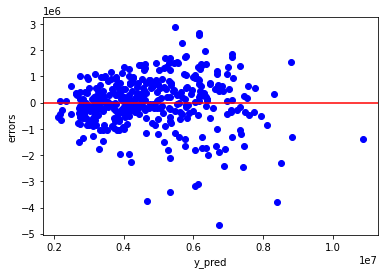

In [15]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(y_pred,diff,color="blue")
plt.axhline(y=0,color="red",linestyle="-")
plt.xlabel("y_pred")
plt.ylabel("errors")
plt.show()

In [29]:
#14  Predic on the test set
y_test_pred=regression.predict(X_test)
diff_test=y_test_pred-y_test

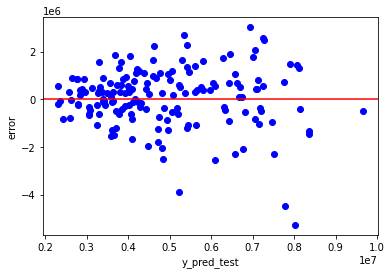

In [30]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(y_test_pred,diff_test,color="blue")
plt.axhline(y=0,color="red",linestyle="-")
plt.xlabel("y_pred_test")
plt.ylabel("error")
plt.show()

In [32]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
rms=np.sqrt(mse)
print(rms)
mse=mean_squared_error(y_train,y_pred)
r2=r2_score(y_train,y_pred)
print(f"Mean squared error(MSE):{mse}")
print(f"R squared value:{r2}")

mse=mean_squared_error(y_test,y_test_pred)
r2=r2_score(y_test,y_test_pred)
print(f"mse:{mse}")
print(f"r2:{r2}")

1238970.4429194625
Mean squared error(MSE):965153171508.6732
R squared value:0.6927795109061218
mse:1535047758428.049
r2:0.6435419628959109


In [14]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)

In [33]:
from sklearn.metrics import r2_score
def adjusted_r2(r2,n,p):
    return 1-((1-r2)*(n-1))/(n-p-1)
r2_test=r2_score(y_test,y_test_pred)
n,p=X_test.shape
adj_r2=adjusted_r2(r2_test,n,p)
print(f"r2 score:{r2_test}")
print(f"adjusted r2 score:{adj_r2}")

r2 score:0.6435419628959109
adjusted r2 score:0.6152141718677715
